In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [12]:
reeses=cv2.imread("reeses_puffs.png",0)

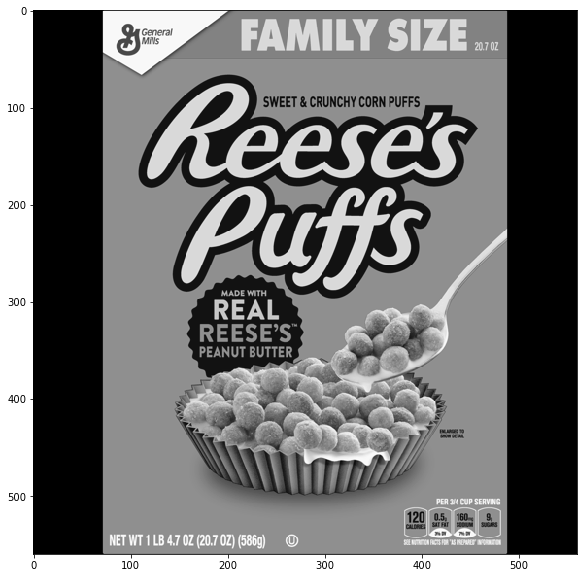

In [13]:
display(reeses)

In [8]:
cereals=cv2.imread("many_cereals.jpg",0)

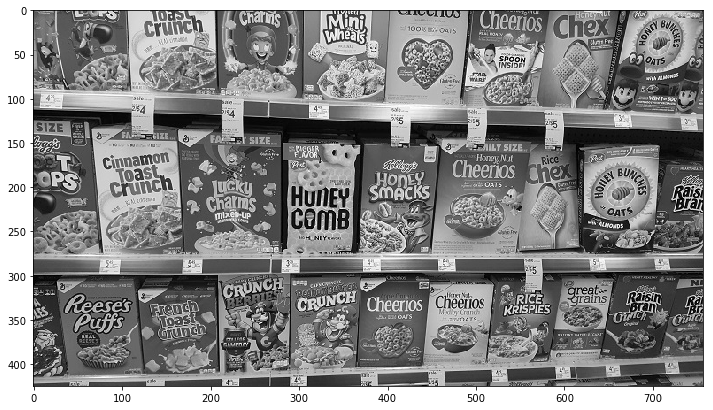

In [9]:
display(cereals)

## Brute Force Detection with ORB Descriptors

In [20]:
# Initialize ORB detector
orb=cv2.ORB_create()
# This line intializes the orb(Oriented FAST and Rotated BRIEF)

# Find the keypoints and descriptors with ORB
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

#orb.detectAndCompute() finds the keypoints (distinctive image features) 
#and computes their descriptors (a vector representing the keypoint in a high 
#kp1 and kp2 are lists of keypoints found in the reeses and cereals images, respectively.
#des1 and des2 are the corresponding descriptors for

# Create BFMatcher object
bf=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# cv2.BFMatcher is the Brute-Force Matcher object,
# which is used to match the descriptors between two images.
# cv2.NORM_HAMMING specifies that the Hamming distance
# should be used to compare the descriptors (appropriate for ORB).
# crossCheck=True ensures that the matches are symmetric,
# meaning that if a descriptor in reeses matches a descriptor in cereals,
# the reverse should also be true.

# Matches descriptors
matches=bf.match(des1,des2)
# This Line matches the descriptors from the two images.
# Each match object contains information about the matching keypoints
# from both images.
# Sort them in the order of their distance.

matches = sorted(matches, key = lambda x:x.distance)

# The matches are sorted based on the distance between the descriptors.
# Shorter distances indicate better matches.

# Draw first 25 matches.
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)


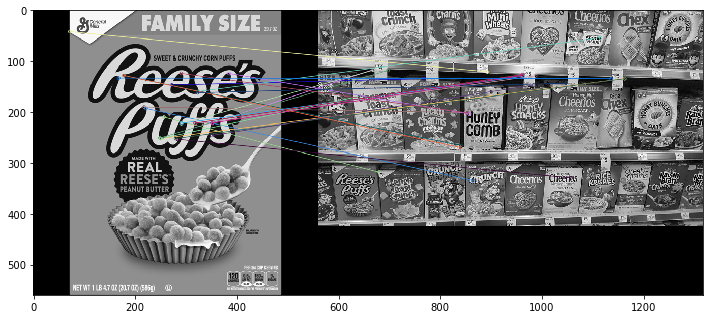

In [21]:
display(reeses_matches)

## Brute Force Matching with SIFT Descriptiors and Ratio  Test SIFT(Scale-Invariant Feature Transform) algorithm to detect and match features between two images(reeses and cereals)

In [27]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create() 
# This Line initializes the SIFT detector,
# which is used for detecting keypoints and computing descriptors.
# SIFT is known for its robustness to changes in scale, rotation, and illumina
################################
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
# sift.detectAndCompute() detects keypoints and computes their 
# corresponding descriptors for the two images.
# kp1 and kp2 are the keypoints detected in reeses and cereals, respectively.
# des1 and des2 are the descriptors associated with these keypoints.

# BFMatcher with default param 
bf = cv2.BFMatcher()
# This line creates a Brute-Force matcher object with default parameters.
# The BFMatcher matches descriptors between the two images by finding the classes
matches=bf.knnMatch(des1,des2,k=2) 
# bf.knnMatch() finds the two best matches for each descriptor in des1
# (from reeses) by comparing them with all descriptors in des2 (from cereals).
# The k2 parameter means that for each descriptor in des1, 
# the two nearest neighbors (best matches) in des are found.

# Apply ratio test
good = []
for match1, match2 in matches: 
    if match1.distance < 0.75*match2.distance: 
        good.append([match1])
#The ratio test is used to filter out poor matches.
#It compares the distance of the closest match (matchi) to the 
#distance of the second closest match (match2).
#If the distance of matchi is less than 0.75 times the distance of match2, 
#the match is considered "good" and added to the good List.
#The ratio test helps eliminate false matches by ensuring that 
#the closest match is significantly better than the second closest.

# cv2.drawMatchesknn expects List of lists as matches.
shift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
#cv2.drawMatchesKnn() draws the matches between the keypoints of the two images
#The good list is passed in as the matches to be drawn, which contains the filtered matches from the ratio test.
#flags = 2 draws the matches without drawing the keypoints themselves.

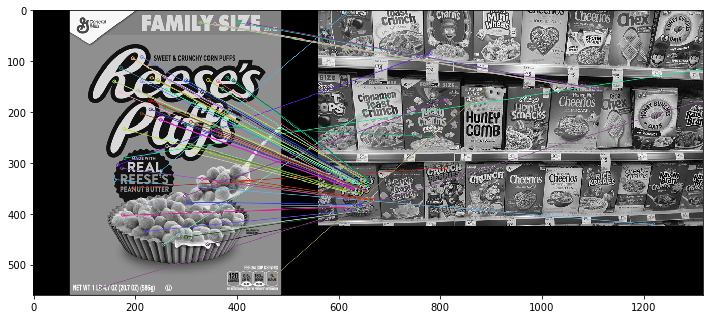

In [28]:
display(shift_matches)

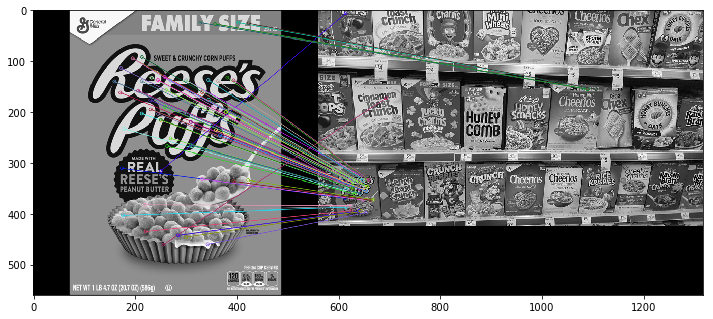

In [35]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT 
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params= dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches=flann.knnMatch(des1,des2,k=2)

good=[]
# Perform ratio test as described by David Lowe in his SIFT paper

good = []
for match1,match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)
